In [1]:
import numpy as np
import pandas as pd

In [2]:
mydata=pd.read_csv('/content/50_Startups.csv')

In [3]:
mydata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
import seaborn as sns

<Axes: ylabel='R&D Spend'>

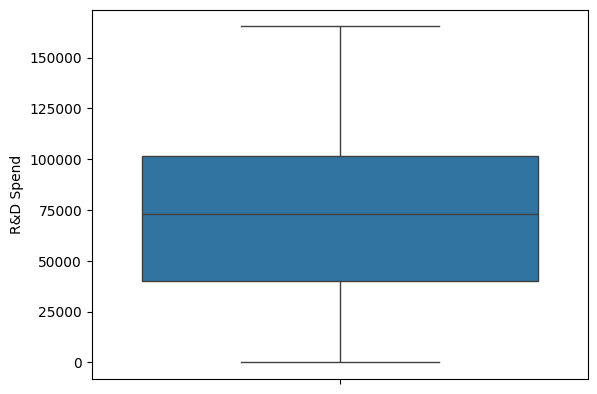

In [13]:
sns.boxplot(mydata['R&D Spend'])

<Axes: ylabel='Administration'>

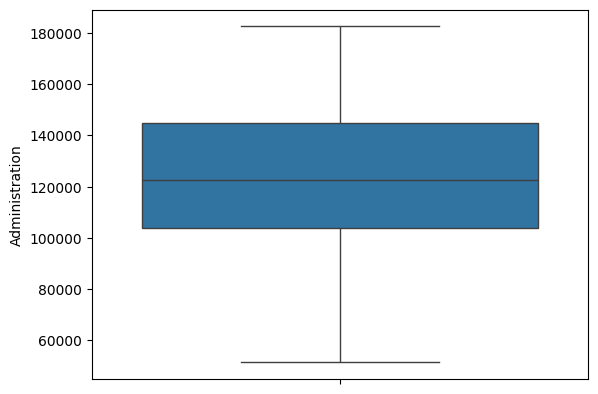

In [14]:
sns.boxplot(mydata['Administration'])

<Axes: ylabel='Marketing Spend'>

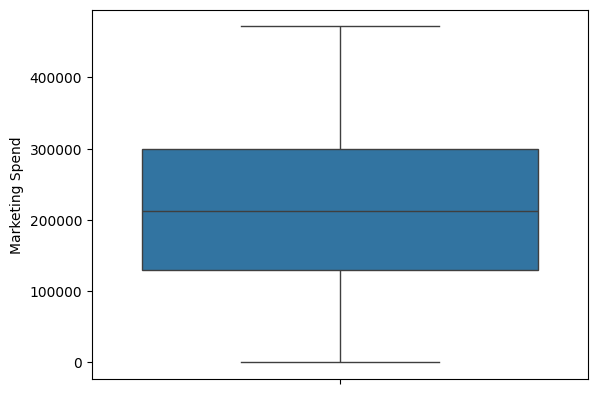

In [16]:
sns.boxplot(mydata['Marketing Spend'])

<Axes: ylabel='Profit'>

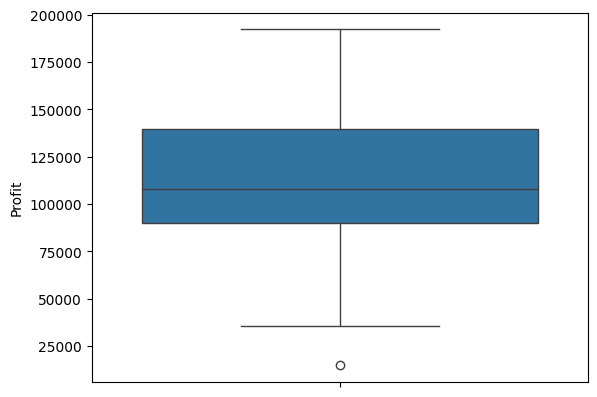

In [19]:
sns.boxplot(mydata['Profit'])

Number of outliers removed: 1


<Axes: ylabel='Profit'>

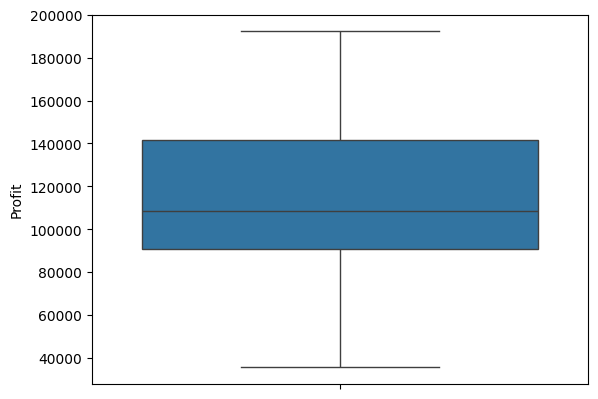

In [20]:
# prompt: code for removing outlier of profit

# Calculate Q1, Q3, and IQR for 'Profit'
Q1 = mydata['Profit'].quantile(0.25)
Q3 = mydata['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
mydata_filtered = mydata[(mydata['Profit'] >= lower_bound) & (mydata['Profit'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(mydata) - len(mydata_filtered)}")

# Display the filtered data (optional)
mydata_filtered.head()

# Create boxplot of the 'Profit' after removing outliers (optional)
sns.boxplot(mydata_filtered['Profit'])

In [21]:
# prompt: add above profit data in the original dataset

# Assuming 'mydata_filtered' is the DataFrame with outliers removed.
# If you want to work with the original data, replace 'mydata_filtered' with 'mydata'.

# Add a new column 'Profit_Category' based on profit ranges
def categorize_profit(profit):
    if profit < 50000:
        return 'Low'
    elif profit < 100000:
        return 'Medium'
    elif profit < 150000:
        return 'High'
    else:
        return 'Very High'

mydata_filtered['Profit_Category'] = mydata_filtered['Profit'].apply(categorize_profit)

# Display the updated DataFrame with the new 'Profit_Category' column
print(mydata_filtered.head())

# You can now use the 'Profit_Category' column for further analysis or visualization

   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

  Profit_Category  
0       Very High  
1       Very High  
2       Very High  
3       Very High  
4       Very High  


<ipython-input-21-5d4736ff7283>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_filtered['Profit_Category'] = mydata_filtered['Profit'].apply(categorize_profit)


In [23]:
# prompt: download the data in my system

from google.colab import files
mydata_filtered.to_csv('mydata_filtered.csv', index=False)
files.download('mydata_filtered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df=pd.read_csv('/content/mydata_filtered.csv')

In [25]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0
Profit_Category,0


In [26]:
# prompt: code of mean, median, variance, skewness, kurtosis for all numeric column

# Assuming 'df' is your DataFrame (replace with 'mydata_filtered' if needed)

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    variance_val = df[col].var()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurt()

    print(f"Column: {col}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Variance: {variance_val}")
    print(f"Skewness: {skewness_val}")
    print(f"Kurtosis: {kurtosis_val}")
    print("-" * 20)

Column: R&D Spend
Mean: 75226.13836734694
Median: 73994.56
Variance: 2035375997.9670765
Skewness: 0.16691404073455401
Kurtosis: -0.7305246567339476
--------------------
Column: Administration
Mean: 121433.63632653063
Median: 122782.75
Variance: 800947109.7617029
Skewness: -0.49454372907935723
Kurtosis: 0.16973108895226918
--------------------
Column: Marketing Spend
Mean: 214409.83326530614
Median: 214634.81
Variance: 14681725438.687876
Skewness: -0.08050426913816956
Kurtosis: -0.5982972529347155
--------------------
Column: Profit
Mean: 113998.99102040817
Median: 108552.04
Variance: 1457044089.3494594
Skewness: 0.2251947059366825
Kurtosis: -0.28329502913553917
--------------------


In [32]:
# prompt: Anova using state column to Profit

import scipy.stats as stats

# Filter profits for each state
florida_profit = df.loc[df['State'] == 'Florida', 'Profit']
newyork_profit = df.loc[df['State'] == 'New York', 'Profit']
california_profit = df.loc[df['State'] == 'California', 'Profit']

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(florida_profit, newyork_profit, california_profit)

# Display results
print("ANOVA Test Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
significance_level = 0.05  # Typically, 0.05 is used as the threshold for significance
if p_value < significance_level:
    print("Result: Statistically significant difference in Profit across States.")
else:
    print("Result: No statistically significant difference in Profit across States.")


ANOVA Test Results:
F-statistic: 0.23
P-value: 0.7955
Result: No statistically significant difference in Profit across States.


In [36]:
# prompt: give me print of correlation matrix only for numeric column

import pandas as pd
import numpy as np

df = pd.read_csv('/content/mydata_filtered.csv')

numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


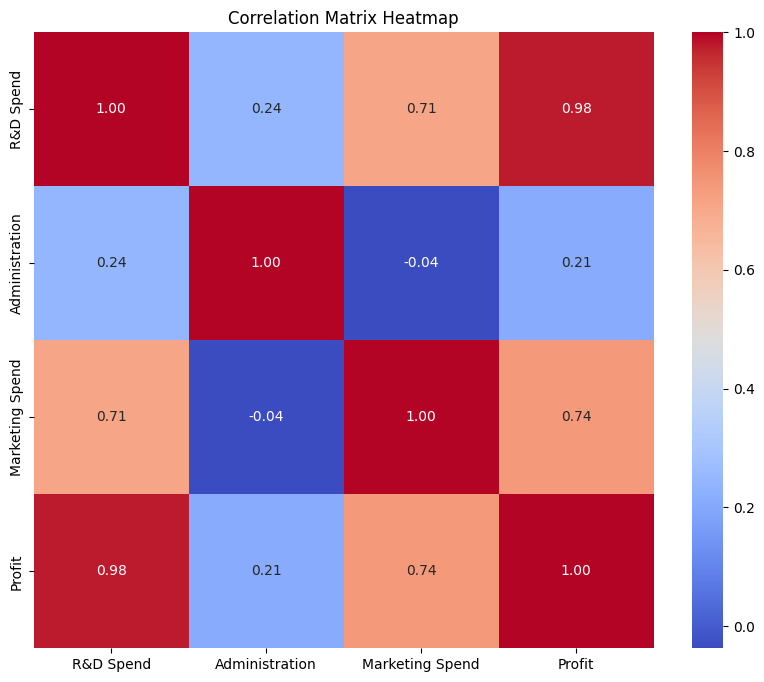

In [37]:
# prompt: above correlation matrix using heatmap

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
# prompt: code for simple linear regression x= R&D Spend and y=Profit

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Define the predictor (X) and target variable (y)
X = df[['R&D Spend']]  # Independent variable: R&D Spend
y = df['Profit']       # Dependent variable: Profit

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

# === 1. Using Scikit-learn ===
# Initialize and fit the Linear Regression model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sklearn_model.predict(X_test)

# Display the Scikit-learn model results
print("Scikit-learn Model Results:")
print(f"Intercept: {sklearn_model.intercept_:.2f}")
print(f"Coefficient for R&D Spend: {sklearn_model.coef_[0]:.2f}")

# Evaluate the Scikit-learn model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print("\nStatsmodels OLS Model Summary:")
print(ols_model.summary())
# === 2


Scikit-learn Model Results:
Intercept: 52367.99
Coefficient for R&D Spend: 0.83
R-squared: 0.9404
Mean Squared Error: 48371001.39

Statsmodels OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     820.9
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           7.36e-27
Time:                        07:28:33   Log-Likelihood:                -405.96
No. Observations:                  39   AIC:                             815.9
Df Residuals:                      37   BIC:                             819.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

In [46]:
# Extract the intercept and coefficient from the OLS model
ols_intercept = ols_model.params['const']  # Intercept (constant term)
ols_coefficient = ols_model.params['R&D Spend']  # Coefficient for R&D Spend

# Display the regression equation
print("\nRegression Model Equation (Statsmodels):")
print(f"Profit = {ols_intercept:.2f} + {ols_coefficient:.2f} * R&D Spend")



Regression Model Equation (Statsmodels):
Profit = 52367.99 + 0.83 * R&D Spend


In [47]:
# prompt: code for multiple regression

# Multiple Linear Regression using Statsmodels

# Assuming 'df' is your DataFrame (replace with 'mydata_filtered' if needed)
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]  # Independent variables
y = df['Profit']  # Dependent variable

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions
predictions = model.predict(X)

# Evaluate the model (example using R-squared)
r_squared = model.rsquared
print(f"R-squared: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           8.85e-32
Time:                        07:31:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.238e+04   5542.657     

In [48]:
# prompt: print multiple regression formula

# Extract coefficients and intercept from the model summary
intercept = model.params['const']
coef_rd = model.params['R&D Spend']
coef_admin = model.params['Administration']
coef_marketing = model.params['Marketing Spend']

# Print the multiple regression formula
print(f"Profit = {intercept:.2f} + ({coef_rd:.2f} * R&D Spend) + ({coef_admin:.2f} * Administration) + ({coef_marketing:.2f} * Marketing Spend)")

Profit = 52382.44 + (0.78 * R&D Spend) + (-0.02 * Administration) + (0.03 * Marketing Spend)
